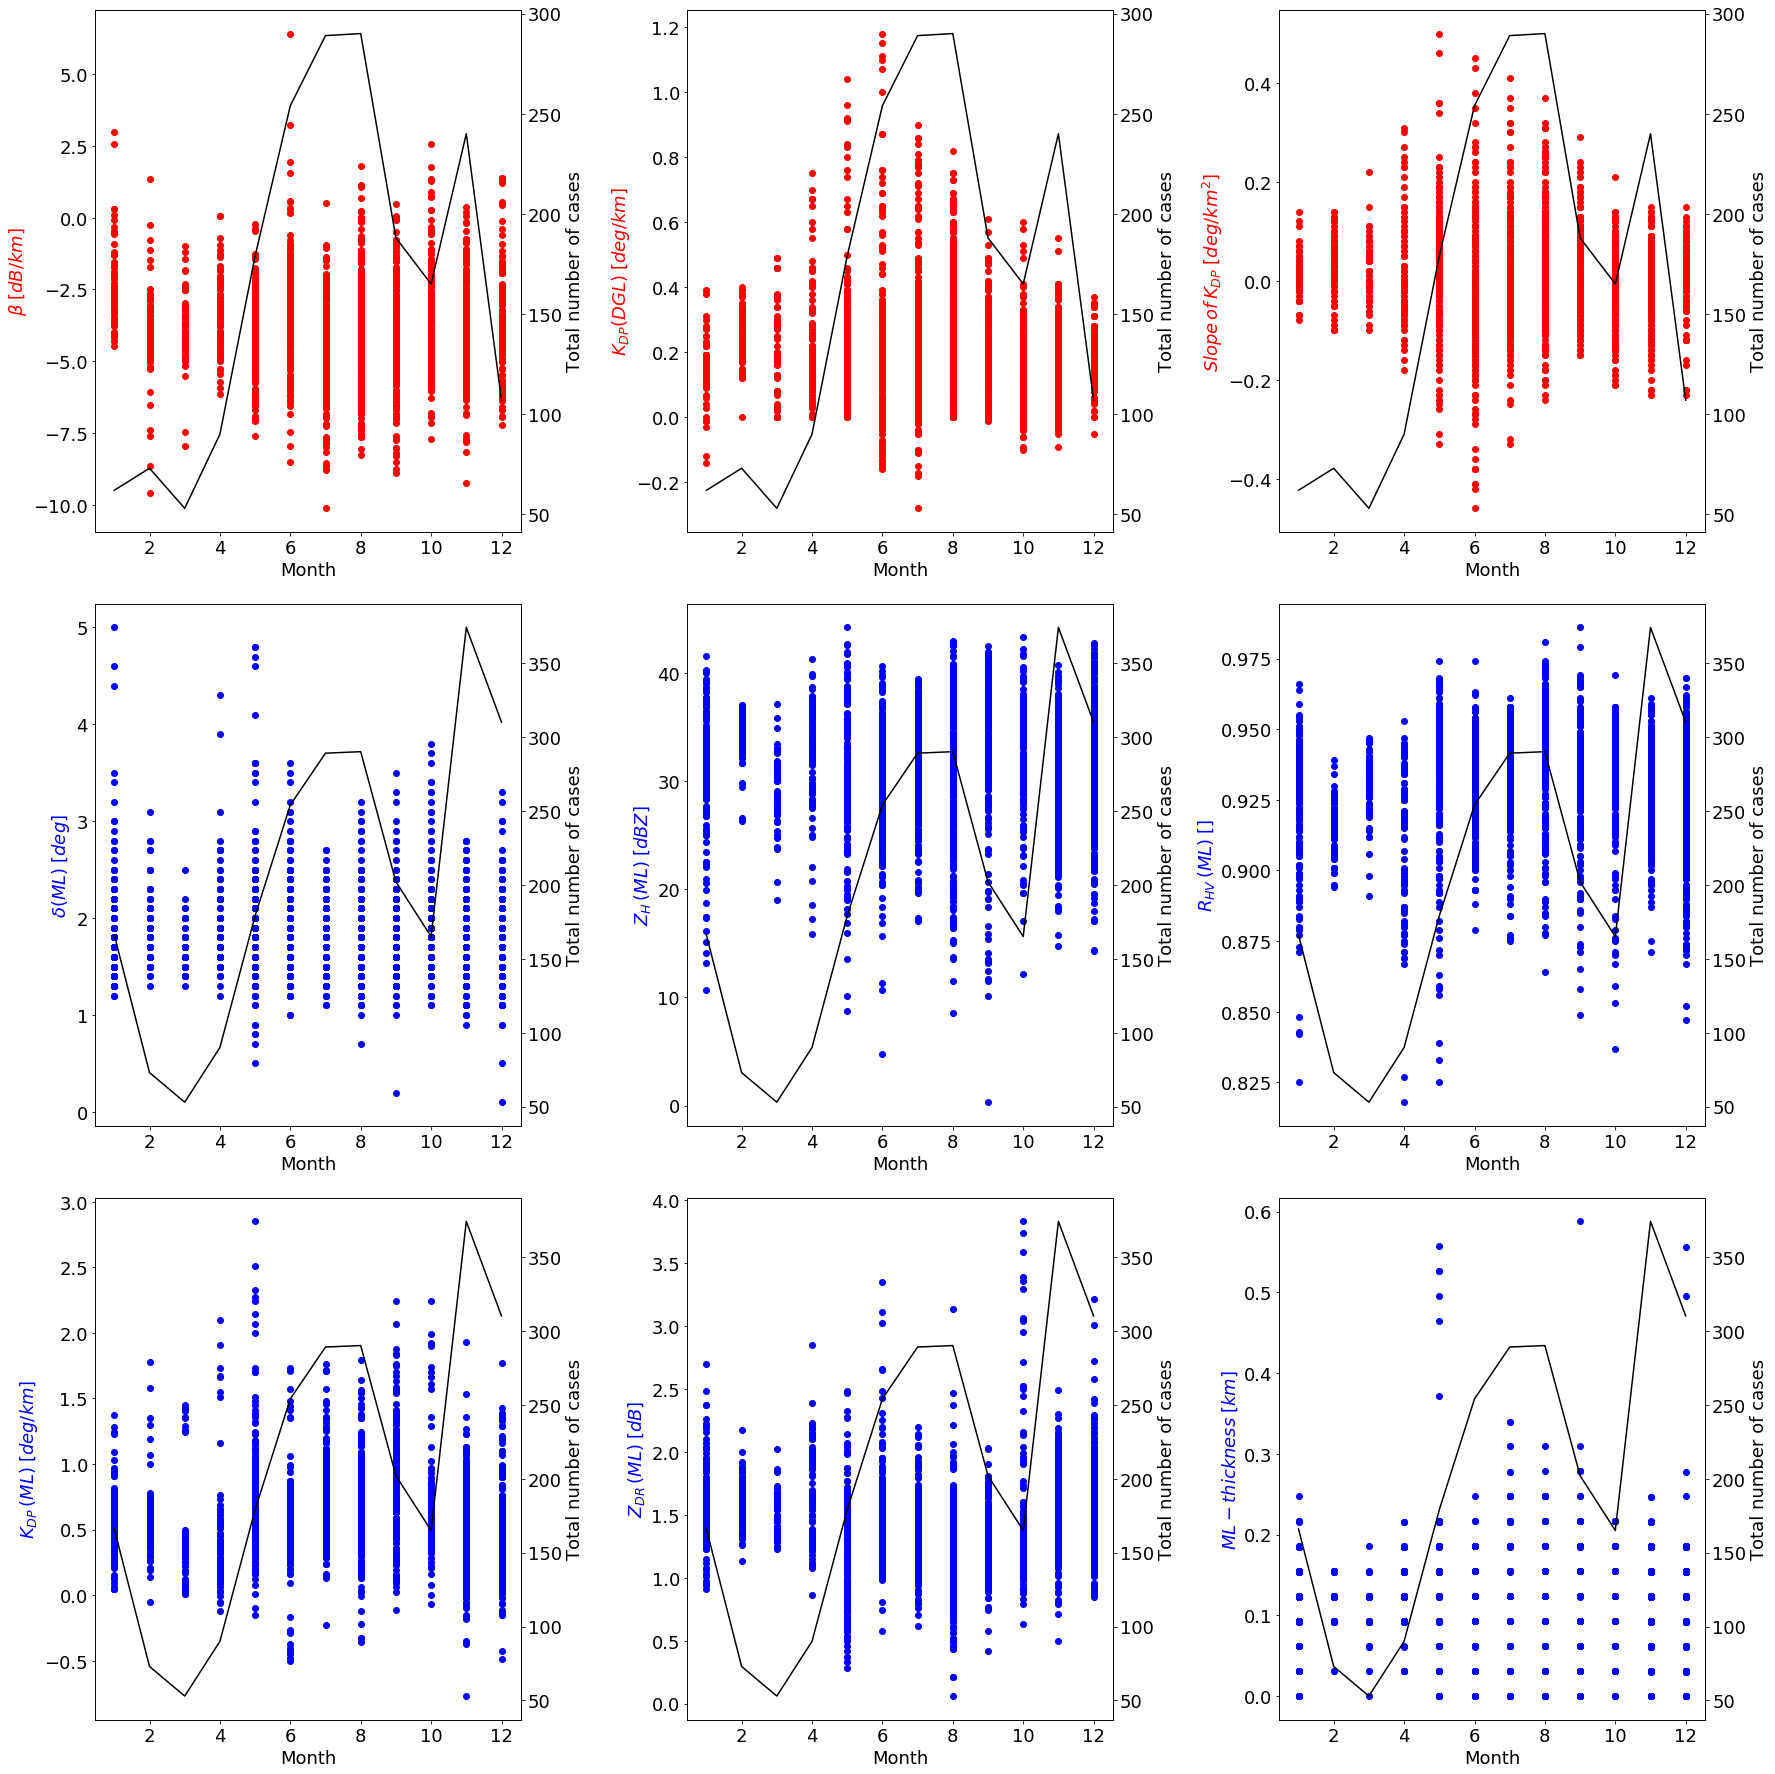

/home/silke/miniconda3/envs/wradlib_27/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2018-04-09 17:52:33.764039. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [1]:
#reads the extended ML-statistic for Carlin to check annual cycles
import sys
sys.path.append('/home/silke/Python/radarlecture2016/radarmeteorology/common')
import warnings
warnings.filterwarnings('ignore')
from helper import create_filename
import pandas as pd 
import numpy as np
import datetime as dt
import glob
from scipy import stats
import wradlib as wrl
from scipy import ndimage
import math
import matplotlib.pyplot as pl
import matplotlib as mpl
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import os
import glob
import scipy
from pandas import rolling_median
import pandas as pd
from scipy.stats import linregress
import numpy.ma as ma
from numpy import asarray as ar
import datetime as dt
from datetime import timedelta
from matplotlib.dates import DayLocator, HourLocator, MinuteLocator,DateFormatter, drange
from scipy.stats.stats import pearsonr
from scipy.signal import correlate

datepath="/home/silke/Python/projects/climatology/"
in_file= open(datepath + "climat_ML_ext.txt","r")
data =np.loadtxt(in_file, skiprows=1, usecols=range(0,10,1), dtype = 'f4')
month=data[:,0]
Zh_ML=data[:,1]
Zdr_ML=data[:,2]
Kdp_ML=data[:,3]
R_ML=data[:,4]
D_ML=data[:,5]
MLthick=data[:,6]
Year=data[:,8]
Day=data[:,9]
#pl.ylim(0, 2)
#pl.plot(month,D_ML,'ro')
in_file2= open(datepath + "climat_DGL.txt","r")
data2 =np.loadtxt(in_file2, skiprows=1, usecols=range(0,4,1), dtype = 'f4')
month2=data2[:,0]
Kdp_D=data2[:,1]
Kdp_slp=data2[:,2]
beta=data2[:,3]

anz = np.arange(1, 13)
anz2 = np.arange(1, 13)
for i in range(1,13):   
    anz[i-1]= np.count_nonzero(month==i)
    anz2[i-1]= np.count_nonzero(month2==i)
#pl.plot(month,anz,'bo')

mpl.rcParams.update({'font.size': 18})
fig, ax = pl.subplots(3,3, figsize=(25, 25))
ax2 = ax[0,0].twinx()
ax[0,0].plot(month2,beta,'ro')
ax[0,0].set_xlabel(r'Month')
ax[0,0].set_ylabel(r'$\beta\;[dB/km]$',color='r')
ax2.plot(range(1,13),anz2,'k')
ax2.set_ylabel(r'Total number of cases',color='k')

ax2 = ax[0,1].twinx()
ax[0,1].plot(month2,Kdp_D,'ro')
ax[0,1].set_xlabel(r'Month')
ax[0,1].set_ylabel(r'$K_{DP}(DGL)\;[deg/km]$',color='r')
ax2.plot(range(1,13),anz2,'k')
ax2.set_ylabel(r'Total number of cases',color='k')

ax2 = ax[0,2].twinx()
ax[0,2].plot(month2,Kdp_slp,'ro')
ax[0,2].set_xlabel(r'Month')
ax[0,2].set_ylabel(r'$Slope\, of\, K_{DP}\;[deg/km^2]$',color='r')
ax2.plot(range(1,13),anz2,'k')
ax2.set_ylabel(r'Total number of cases',color='k')

ax2 = ax[1,0].twinx()
ax[1,0].plot(month,D_ML,'bo')
ax[1,0].set_xlabel(r'Month')
ax[1,0].set_ylabel(r'$\delta (ML)\;[deg]$',color='b')
ax2.plot(range(1,13),anz,'k')
ax2.set_ylabel(r'Total number of cases',color='k')

ax2 = ax[1,1].twinx()
ax[1,1].plot(month,Zh_ML,'bo')
ax[1,1].set_xlabel(r'Month')
ax[1,1].set_ylabel(r'$Z_H\, (ML)\;[dBZ]$',color='b')
ax2.plot(range(1,13),anz,'k')
ax2.set_ylabel(r'Total number of cases',color='k')

ax2 = ax[1,2].twinx()
ax[1,2].plot(month, R_ML,'bo')
ax[1,2].set_xlabel(r'Month')
ax[1,2].set_ylabel(r'$R_{HV}\, (ML)\;[]$',color='b')
ax2.plot(range(1,13),anz,'k')
ax2.set_ylabel(r'Total number of cases',color='k')

ax2 = ax[2,0].twinx()
ax[2,0].plot(month, Kdp_ML,'bo')
ax[2,0].set_xlabel(r'Month')
ax[2,0].set_ylabel(r'$K_{DP}\, (ML)\;[deg/km]$',color='b')
ax2.plot(range(1,13),anz,'k')
ax2.set_ylabel(r'Total number of cases',color='k')

ax2 = ax[2,1].twinx()
ax[2,1].plot(month, Zdr_ML,'bo')
ax[2,1].set_xlabel(r'Month')
ax[2,1].set_ylabel(r'$Z_{DR}\, (ML)\;[dB]$',color='b')
ax2.plot(range(1,13),anz,'k')
ax2.set_ylabel(r'Total number of cases',color='k')

ax2 = ax[2,2].twinx()
ax[2,2].plot(month, MLthick,'bo')
ax[2,2].set_xlabel(r'Month')
ax[2,2].set_ylabel(r'$ML-thickness\;[km]$',color='b')
ax2.plot(range(1,13),anz,'k')
ax2.set_ylabel(r'Total number of cases',color='k')
fig.tight_layout()
fig.savefig('/home/silke/Python/projects/climatology/seasonal.png')